In [5]:
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/9f/6e/264673e64001b99d747aff5a288eca82826c024437a3694e19aed1decf46/matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/46/45/a498b5291f6c0d91b2394b1ed7447442a57d1c9b9cf8f439aee3c316a56e/fonttools-4.55.3-cp312-cp312-win_amd64.whl.metadata
  


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import random
import time
import matplotlib.pyplot as plt

Visualizing the cube with properly placed dots:


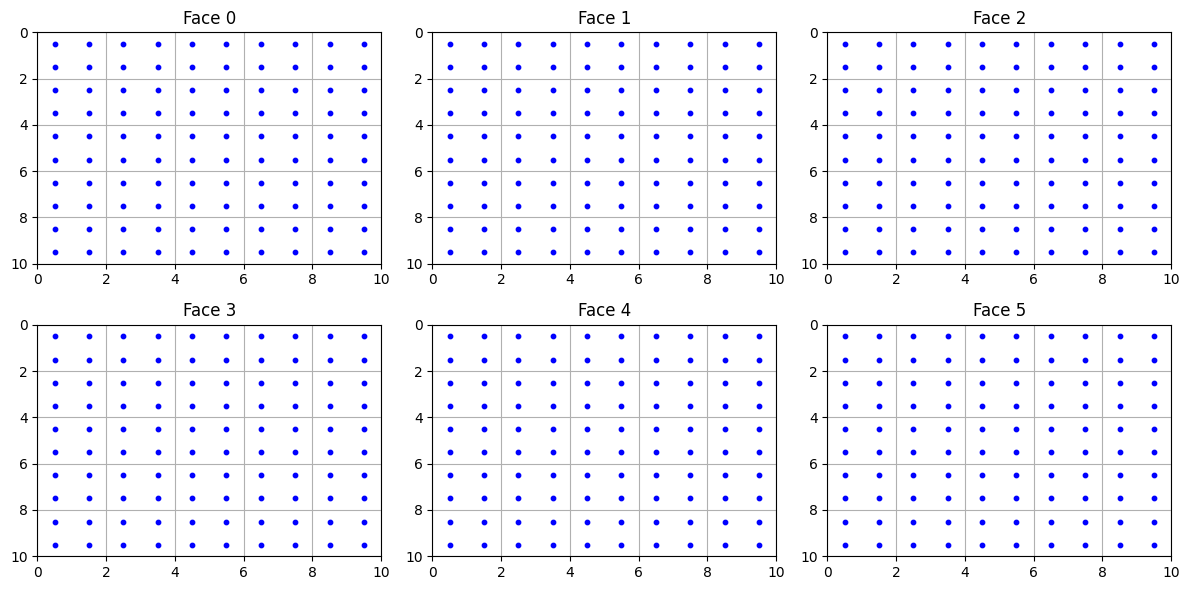

In [20]:
# Define the cube structure
FACES = 6
GRID_SIZE = 10

# Generate all dots on the cube
def generate_dots():
    dots = []
    for face in range(FACES):
        for row in range(GRID_SIZE):
            for col in range(GRID_SIZE):
                dots.append((face, row, col))
    return dots

# Check if a line is valid
def is_valid_line(dot1, dot2):
    face1, row1, col1 = dot1
    face2, row2, col2 = dot2
    
    # Cannot stay on the same face
    if face1 == face2:
        return False
    return True

# Precompute all valid lines
def compute_valid_lines(dots):
    valid_lines = set()
    for i in range(len(dots)):
        for j in range(i + 1, len(dots)):
            if is_valid_line(dots[i], dots[j]):
                # Sort the line's endpoints for consistency
                valid_lines.add(tuple(sorted([dots[i], dots[j]])))
    return list(valid_lines)

# Simulate random line selection and calculate duplicates
def simulate_progress(valid_lines, trial_steps):
    total_lines = len(valid_lines)
    duplicate_count = 0
    results = []

    for trial in range(1, max(trial_steps) + 1):
        # Randomly select two lines
        line1 = random.choice(valid_lines)
        line2 = random.choice(valid_lines)
        
        # Check if they are the same
        if line1 == line2:
            duplicate_count += 1
        
        # Record the probability for specific steps
        if trial in trial_steps:
            probability = duplicate_count / trial
            results.append((trial, probability))
    
    return results

# Updated display_cube_with_dots function with correct dot generation
def display_cube_with_dots():
    fig, ax = plt.subplots(2, 3, figsize=(12, 6))

    # Loop through the 6 faces
    for face in range(FACES):
        ax[face // 3, face % 3].set_title(f"Face {face}")
        ax[face // 3, face % 3].set_xlim(0, GRID_SIZE)
        ax[face // 3, face % 3].set_ylim(0, GRID_SIZE)
        ax[face // 3, face % 3].invert_yaxis()  # Invert y-axis for grid alignment
        ax[face // 3, face % 3].axis("on")
        ax[face // 3, face % 3].grid(visible=True)

        # Generate and plot the dots for each face
        for row in range(GRID_SIZE):
            for col in range(GRID_SIZE):
                ax[face // 3, face % 3].scatter(col + 0.5, row + 0.5, color="blue", s=10)  # Adjust to center dots

    plt.tight_layout()
    plt.show()

# Call the visualization function
print("Visualizing the cube with properly placed dots:")
display_cube_with_dots()



Visualizing the cube with properly placed dots:


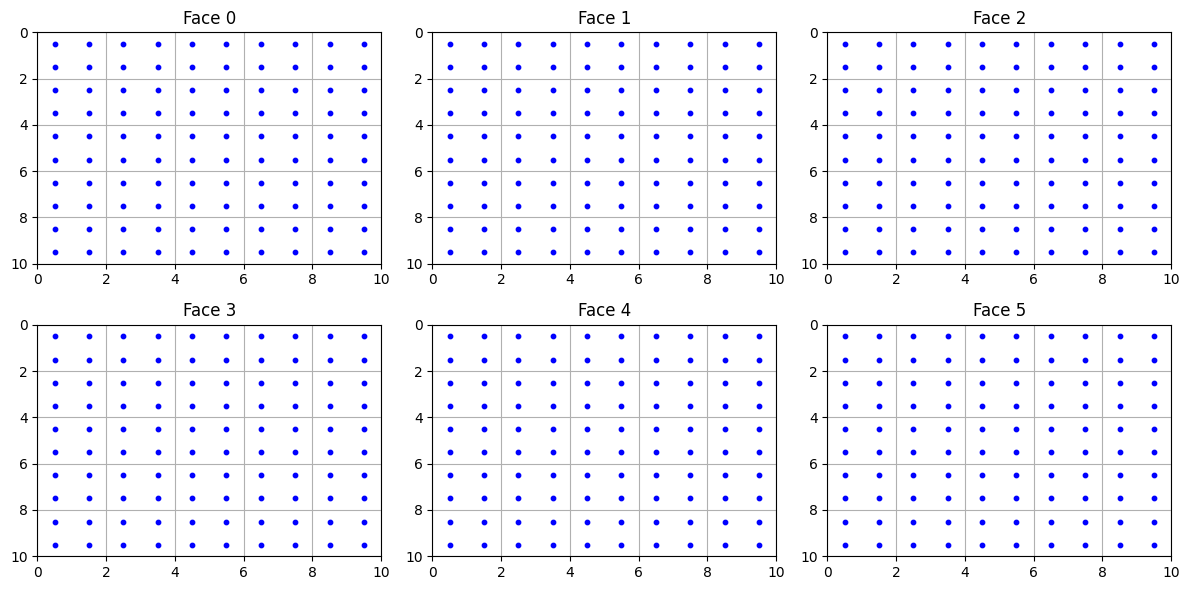


Starting debug simulation with 10 trials...

Trial 1:
  Line 1: ((0, 5, 2), (4, 6, 4))
  Line 2: ((4, 2, 1), (5, 1, 8))
  Is Duplicate: False

Trial 2:
  Line 1: ((2, 1, 1), (3, 0, 9))
  Line 2: ((4, 2, 1), (5, 6, 1))
  Is Duplicate: False

Trial 3:
  Line 1: ((0, 2, 2), (4, 2, 6))
  Line 2: ((4, 1, 8), (5, 1, 3))
  Is Duplicate: False

Trial 4:
  Line 1: ((0, 1, 2), (3, 3, 9))
  Line 2: ((0, 5, 6), (2, 2, 6))
  Is Duplicate: False

Trial 5:
  Line 1: ((1, 2, 6), (3, 1, 4))
  Line 2: ((0, 7, 2), (1, 7, 9))
  Is Duplicate: False

Trial 6:
  Line 1: ((3, 7, 6), (4, 4, 7))
  Line 2: ((1, 0, 8), (2, 1, 1))
  Is Duplicate: False

Trial 7:
  Line 1: ((1, 6, 7), (2, 0, 7))
  Line 2: ((0, 5, 7), (4, 8, 6))
  Is Duplicate: False

Trial 8:
  Line 1: ((1, 3, 1), (4, 1, 2))
  Line 2: ((3, 7, 8), (5, 3, 8))
  Is Duplicate: False

Trial 9:
  Line 1: ((4, 2, 2), (5, 2, 5))
  Line 2: ((0, 7, 8), (4, 2, 7))
  Is Duplicate: False

Trial 10:
  Line 1: ((3, 4, 0), (5, 4, 6))
  Line 2: ((2, 3, 3), (5, 9, 

0.0

In [23]:
import random
import matplotlib.pyplot as plt

# Define the cube structure
FACES = 6
GRID_SIZE = 10

# Generate all dots on the cube
def generate_dots():
    dots = []
    for face in range(FACES):
        for row in range(GRID_SIZE):
            for col in range(GRID_SIZE):
                dots.append((face, row, col))
    return dots

# Check if a line is valid
def is_valid_line(dot1, dot2):
    face1, row1, col1 = dot1
    face2, row2, col2 = dot2
    
    # Cannot stay on the same face
    if face1 == face2:
        return False
    return True

# Precompute all valid lines
def compute_valid_lines(dots):
    valid_lines = set()
    for i in range(len(dots)):
        for j in range(i + 1, len(dots)):
            if is_valid_line(dots[i], dots[j]):
                # Sort the line's endpoints for consistency
                valid_lines.add(tuple(sorted([dots[i], dots[j]])))
    return list(valid_lines)

# Simulate random line selection and calculate duplicates with debug output
def simulate_probability_debug(valid_lines, num_trials=10):
    """
    Simulate the probability of randomly drawing the same line twice, with debugging.
    - valid_lines: List of all valid lines (precomputed).
    - num_trials: Number of trials to run for debugging.
    """
    duplicate_count = 0
    seen_lines = set()  # To track lines we've already seen

    print("\nStarting debug simulation with 10 trials...\n")
    for trial in range(1, num_trials + 1):
        # Randomly pick two lines
        line1 = random.choice(valid_lines)
        line2 = random.choice(valid_lines)

        # Check if the two lines are the same
        is_duplicate = line1 == line2
        if is_duplicate:
            duplicate_count += 1

        # Print the details of this trial
        print(f"Trial {trial}:")
        print(f"  Line 1: {line1}")
        print(f"  Line 2: {line2}")
        print(f"  Is Duplicate: {is_duplicate}\n")

        # Track the line in the seen set for debugging (optional)
        seen_lines.add(line1)
        seen_lines.add(line2)

    probability = duplicate_count / num_trials
    print(f"\nDebug Complete: {duplicate_count} duplicates in {num_trials} trials.")
    print(f"Probability of drawing the same line: {probability:.6f}\n")

    return probability

# Display the cube with dots
def display_cube_with_dots():
    fig, ax = plt.subplots(2, 3, figsize=(12, 6))

    # Loop through the 6 faces
    for face in range(FACES):
        ax[face // 3, face % 3].set_title(f"Face {face}")
        ax[face // 3, face % 3].set_xlim(0, GRID_SIZE)
        ax[face // 3, face % 3].set_ylim(0, GRID_SIZE)
        ax[face // 3, face % 3].invert_yaxis()  # Invert y-axis for grid alignment
        ax[face // 3, face % 3].axis("on")
        ax[face // 3, face % 3].grid(visible=True)

        # Generate and plot the dots for each face
        for row in range(GRID_SIZE):
            for col in range(GRID_SIZE):
                ax[face // 3, face % 3].scatter(col + 0.5, row + 0.5, color="blue", s=10)  # Adjust to center dots

    plt.tight_layout()
    plt.show()

# Main execution
print("Visualizing the cube with properly placed dots:")
display_cube_with_dots()

# Generate dots and precompute valid lines
dots = generate_dots()
valid_lines = compute_valid_lines(dots)

# Run the debugging simulation
simulate_probability_debug(valid_lines, num_trials=10)


In [68]:
import matplotlib.pyplot as plt
import random

# Cube dimensions
GRID_SIZE = 10

# Generate dots on the cube's faces
def generate_cube_faces():
    dots = []
    # XY planes (z = 0 and z = GRID_SIZE)
    for z in [0, GRID_SIZE]:
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                dots.append((x, y, z))
    # XZ planes (y = 0 and y = GRID_SIZE)
    for y in [0, GRID_SIZE]:
        for x in range(GRID_SIZE):
            for z in range(GRID_SIZE):
                dots.append((x, y, z))
    # YZ planes (x = 0 and x = GRID_SIZE)
    for x in [0, GRID_SIZE]:
        for y in range(GRID_SIZE):
            for z in range(GRID_SIZE):
                dots.append((x, y, z))
    return dots

def is_valid_line(dot1, dot2):
    """
    A valid line must connect dots through the cube (different faces) but not go "over" the walls.
    """
    # Dots cannot be the same
    if dot1 == dot2:
        return False

    # Extract coordinates
    x1, y1, z1 = dot1
    x2, y2, z2 = dot2

    # Rule 1: Ensure at least two coordinates differ
    diff_x = abs(x1 - x2)
    diff_y = abs(y1 - y2)
    diff_z = abs(z1 - z2)

    # A valid line must span at least two dimensions
    if sum([diff_x > 0, diff_y > 0, diff_z > 0]) < 2:
        return False

    # Rule 2: Handle cases where one coordinate is fixed at a boundary (0 or GRID_SIZE)
    if (
        (x1 == x2 == 0 or x1 == x2 == GRID_SIZE) or  # Both dots on the same X boundary
        (y1 == y2 == 0 or y1 == y2 == GRID_SIZE) or  # Both dots on the same Y boundary
        (z1 == z2 == 0 or z1 == z2 == GRID_SIZE)     # Both dots on the same Z boundary
    ):
        return False

    # Otherwise, the line is valid
    return True

# Precompute all valid lines
def compute_valid_lines(dots):
    valid_lines = []
    for i in range(len(dots)):
        for j in range(i + 1, len(dots)):
            if is_valid_line(dots[i], dots[j]):
                valid_lines.append((dots[i], dots[j]))
    return valid_lines

# Visualize the cube as a wireframe
def visualize_realistic_cube(dots, valid_lines, num_lines=5, display=True):
    if not display:
        return
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    
    # Draw the cube wireframe
    for edge in [
        # Edges along x-axis
        [(0, 0, 0), (GRID_SIZE, 0, 0)],
        [(0, GRID_SIZE, 0), (GRID_SIZE, GRID_SIZE, 0)],
        [(0, 0, GRID_SIZE), (GRID_SIZE, 0, GRID_SIZE)],
        [(0, GRID_SIZE, GRID_SIZE), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
        # Edges along y-axis
        [(0, 0, 0), (0, GRID_SIZE, 0)],
        [(GRID_SIZE, 0, 0), (GRID_SIZE, GRID_SIZE, 0)],
        [(0, 0, GRID_SIZE), (0, GRID_SIZE, GRID_SIZE)],
        [(GRID_SIZE, 0, GRID_SIZE), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
        # Edges along z-axis
        [(0, 0, 0), (0, 0, GRID_SIZE)],
        [(GRID_SIZE, 0, 0), (GRID_SIZE, 0, GRID_SIZE)],
        [(0, GRID_SIZE, 0), (0, GRID_SIZE, GRID_SIZE)],
        [(GRID_SIZE, GRID_SIZE, 0), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
    ]:
        x, y, z = zip(*edge)
        ax.plot(x, y, z, color="black")
    
    # Plot dots on the cube faces
    x_dots = [dot[0] for dot in dots]
    y_dots = [dot[1] for dot in dots]
    z_dots = [dot[2] for dot in dots]
    ax.scatter(x_dots, y_dots, z_dots, color="blue", s=10)
    
    # Draw a few random valid lines
    print("\nSelected Lines:")
    for _ in range(num_lines):
        line = random.choice(valid_lines)
        print(f"Line from {line[0]} to {line[1]}")
        x_line = [line[0][0], line[1][0]]
        y_line = [line[0][1], line[1][1]]
        z_line = [line[0][2], line[1][2]]
        ax.plot(x_line, y_line, z_line, color="red", linewidth=1)

    # Set limits and turn off axes
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_zlim(0, GRID_SIZE)
    ax.axis("off")
    
    # Set title
    ax.set_title("Realistic 3D Cube Visualization")
    plt.show()

# Test percentage of duplicates
def test_duplicate_percentage(valid_lines, runs):
    duplicates = 0
    last_line = None

    for _ in range(runs):
        current_line = random.choice(valid_lines)
        if current_line == last_line:
            duplicates += 1
        last_line = current_line

    percentage = (duplicates / runs) * 100
    print(f"Runs: {runs}, Duplicates: {duplicates}, Percentage: {percentage:.2f}%")
    return percentage

# Main execution
dots = generate_cube_faces()
valid_lines = compute_valid_lines(dots)

# Visualize the realistic cube (optional)
visualize_realistic_cube(dots, valid_lines, num_lines=100, display=False)

# Test duplicate percentage for various runs
for runs in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    test_duplicate_percentage(valid_lines, runs)


Runs: 10, Duplicates: 0, Percentage: 0.00%
Runs: 100, Duplicates: 0, Percentage: 0.00%
Runs: 1000, Duplicates: 0, Percentage: 0.00%
Runs: 10000, Duplicates: 0, Percentage: 0.00%
Runs: 100000, Duplicates: 0, Percentage: 0.00%
Runs: 1000000, Duplicates: 6, Percentage: 0.00%
Runs: 10000000, Duplicates: 77, Percentage: 0.00%
